In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\basic2.csv')

In [3]:
df.drop(['color'], axis=1, inplace=True)

In [4]:
df.head()

x           y
0  394.778257  162.929596
1  113.187672  136.498196
2  400.937252  194.179802
3  194.372621  208.106101
4  290.609779  135.674950

In [5]:
df.tail()

x           y
3187   87.357416  177.147675
3188  408.208477  375.198373
3189  507.197179  398.452657
3190  408.694106  365.368554
3191  522.873290  229.099878

In [6]:
df.describe()

x            y
count  3192.000000  3192.000000
mean    265.041472   236.363822
std     150.125455    96.686791
min      23.966141    16.000000
25%      96.839902   158.423641
50%     281.267153   233.610198
75%     395.580743   319.184941
max     542.397863   442.281013

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3192 non-null   float64
 1   y       3192 non-null   float64
dtypes: float64(2)
memory usage: 50.0 KB


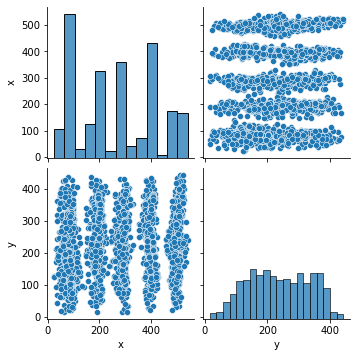

In [8]:
sns.pairplot(data=df)

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())

In [10]:
df_norm

x         y
0     0.715257  0.344678
1     0.172099  0.282673
2     0.727137  0.417987
3     0.328696  0.450656
4     0.514327  0.280742
...        ...       ...
3187  0.122275  0.378032
3188  0.741163  0.842633
3189  0.932102  0.897184
3190  0.742100  0.819573
3191  0.962339  0.499905

[3192 rows x 2 columns]

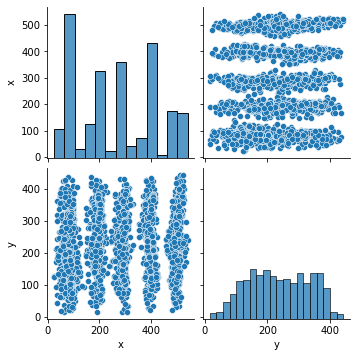

In [11]:
sns.pairplot(data=df)

In [12]:
centers = df.sample(5)

In [13]:
centers

x           y
2294  375.557140  338.501493
1694  189.614154  190.998746
2484  478.579801   99.835618
2579  403.569164  178.568178
1704  498.316392   47.453582

In [14]:
distances = np.zeros((len(df.index),5))

In [15]:
distances

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [16]:
for i in range(5):
    distances[:,i] = (((df.iloc[:, :] - centers.iloc[i, :]) ** 2).sum(axis=1)) ** 0.5
distances

array([[176.62089979, 207.07531572, 104.89780162,  17.94004702,
        155.09627721],
       [331.1239497 ,  93.86861641, 367.22684075, 293.41317996,
        395.28859645],
       [146.53634551, 211.34703903, 122.18506587,  15.83192211,
        176.10019993],
       ...,
       [144.64868433, 379.33639825, 299.98514925, 243.08013003,
        351.11140462],
       [ 42.66025636, 280.00152744, 274.57558196, 186.87066538,
        330.30604505],
       [183.49594347, 335.43009409, 136.64245986, 129.5643748 ,
        183.29871187]])

In [17]:
closest = np.argmin(distances, axis = 1)

In [18]:
closest

array([3, 1, 3, ..., 0, 0, 3], dtype=int64)

In [19]:
for i in range(len(centers.index)):
    centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)

               x           y
2294  368.566402  338.267767
1694  189.614154  190.998746
2484  478.579801   99.835618
2579  403.569164  178.568178
1704  498.316392   47.453582
               x           y
2294  368.566402  338.267767
1694  140.483859  218.695991
2484  478.579801   99.835618
2579  403.569164  178.568178
1704  498.316392   47.453582
               x           y
2294  368.566402  338.267767
1694  140.483859  218.695991
2484  483.868075  131.214181
2579  403.569164  178.568178
1704  498.316392   47.453582
               x           y
2294  368.566402  338.267767
1694  140.483859  218.695991
2484  483.868075  131.214181
2579  405.417197  185.372702
1704  498.316392   47.453582
               x           y
2294  368.566402  338.267767
1694  140.483859  218.695991
2484  483.868075  131.214181
2579  405.417197  185.372702
1704  482.816216   50.067276


In [20]:
centers

x           y
2294  368.566402  338.267767
1694  140.483859  218.695991
2484  483.868075  131.214181
2579  405.417197  185.372702
1704  482.816216   50.067276

In [21]:
# np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = df.sample(5)
distances = np.zeros((len(df.index),5))


while True:
    old_closest = closest.copy()
    print(closest)
    
    for i in range(5):
        distances[:,i] = (((df.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(len(centers.index)):
        centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)
    if all(closest == old_closest):
        break

[3 1 3 ... 0 0 3]
               x           y
1502  320.334455  326.359780
499   190.227471  341.782343
2306  451.219082  210.449626
259    77.537256  262.692679
2392  182.731404  142.272301
[2 4 2 ... 2 0 2]
               x           y
1502  336.806749  323.126157
499   184.504523  334.997131
2306  450.725976  207.057512
259    77.840523  257.040808
2392  175.137129  136.944966
[2 4 2 ... 2 0 2]
               x           y
1502  347.451327  322.548050
499   177.688372  333.935384
2306  450.641999  196.733899
259    76.983808  251.139938
2392  173.028412  134.819783
[2 4 2 ... 0 0 2]
               x           y
1502  356.017896  324.094675
499   168.637205  335.280925
2306  448.325511  187.963721
259    76.426946  239.810199
2392  175.092816  134.117629
[2 4 2 ... 0 0 2]
               x           y
1502  361.612758  324.647317
499   161.230886  336.672839
2306  447.204763  182.216496
259    76.316029  227.643525
2392  180.281243  134.880723
[2 4 2 ... 0 0 2]
               x      

In [22]:
closest

array([2, 3, 2, ..., 0, 0, 2], dtype=int64)

In [23]:
df['new_column'] = closest.tolist()

In [24]:
df

x           y  new_column
0     394.778257  162.929596           2
1     113.187672  136.498196           3
2     400.937252  194.179802           2
3     194.372621  208.106101           4
4     290.609779  135.674950           4
...          ...         ...         ...
3187   87.357416  177.147675           3
3188  408.208477  375.198373           0
3189  507.197179  398.452657           0
3190  408.694106  365.368554           0
3191  522.873290  229.099878           2

[3192 rows x 3 columns]

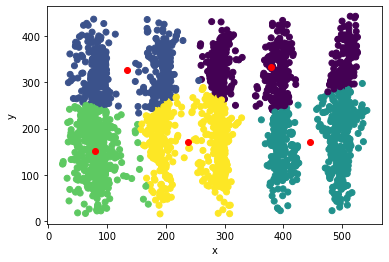

In [25]:
color=['blue','green','cyan','yellow','purple']
plt.scatter(df['x'],df['y'], c=closest)
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
